Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


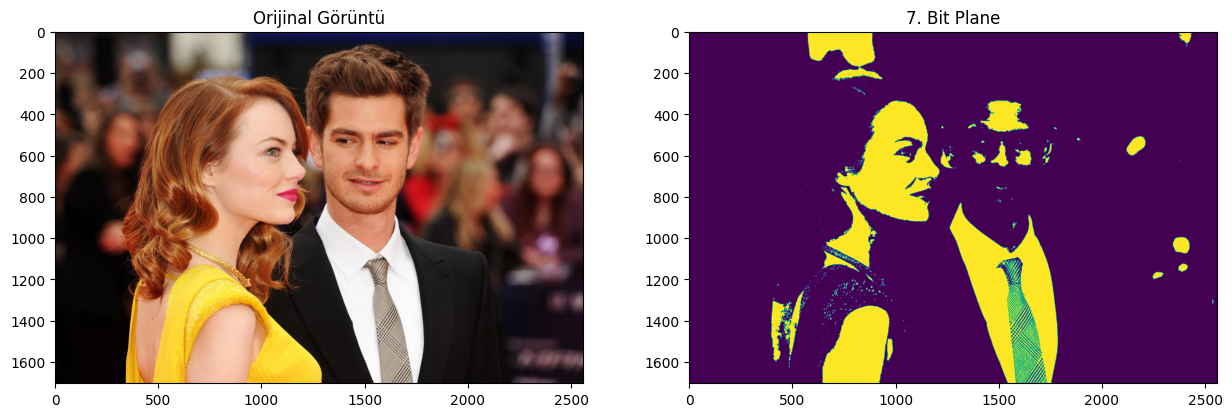

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

# Google Drive'ı /content/drive altına bağla
drive.mount('/content/drive')

# Görüntüyü yükle (renkli)
img_path = '/content/drive/MyDrive/GoruntuIsleme/images/emma_stone.png'
img = cv2.imread(img_path)

# Görüntü başarıyla yüklenmediyse, uygun bir hata mesajı ver
if img is None:
    print("Görüntü yüklenemedi. Dosya adını ve yolunu kontrol edin.")
else:
    # Bit plane slicing fonksiyonu (renkli görüntü için)
    def bit_plane_slice_color(image, bit_position):
        bit_plane = (image[:, :, 0] >> bit_position) & 1
        return bit_plane * 255

    # Görüntü boyutları
    height, width, channels = img.shape

    # Bit plane slicing uygula (örneğin, 7. bit plane'i)
    bit_position = 7  # İstediğiniz bit düzeyini seçebilirsiniz
    img_bit_plane = bit_plane_slice_color(img, bit_position)

    # Görüntüleri göster
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Orijinal Görüntü')

    plt.subplot(1, 2, 2)
    plt.imshow(img_bit_plane)
    plt.title(f'{bit_position}. Bit Plane')

    plt.show()
